<a href="https://colab.research.google.com/github/Codeginner/machineLearning-task/blob/main/UAS/PyTorch/Chapter%2001/Code_Chapter_01_pytorch_workflow_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Gilman Muslih Z

NIM: 1103201075

Codes Chapter 01 - PyTorch Workflow Fundamental

In [ ]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [ ]:
# import Library PyTorch dan cek versi
import torch
from torch import nn
import matplotlib.pyplot as plt

# Versi PyTorch
torch.__version__


'1.12.1+cu113'

Menampilkan versi PyTorch yang diinstal.

In [ ]:
# Membuat parameter *known*
weight = 0.7
bias = 0.3

# Membuat data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

Menampilkan beberapa elemen pertama dari data X dan hasilnya y.

Kode ini membuat data linier dengan parameter bobot dan bias yang diketahui, kemudian menampilkan beberapa elemen pertama dari data dan hasilnya.



In [ ]:
# Membuat train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

Menampilkan panjang data untuk training set dan test set.

Kode ini membagi data menjadi train set dan test set, kemudian menampilkan panjang masing-masing set

In [ ]:
# Fungsi untuk plot training data, test data, dan predictions
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size": 14})

plot_predictions();


Kode ini mendefinisikan fungsi plot_predictions untuk memplot data training, testing, dan prediksi

In [ ]:
# Membuat kelas model Linear Regression
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

# Set manual seed untuk konsistensi
torch.manual_seed(42)

# Membuat instance dari model
model_0 = LinearRegressionModel()

# Menampilkan parameter model
list(model_0.parameters())


Menampilkan parameter dari model Linear Regression.

Kode ini mendefinisikan model Linear Regression menggunakan PyTorch dan menampilkan parameter dari model tersebut.



We can also get the state (what the model contains) of the model using [`.state_dict()`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.state_dict).

In [ ]:
# Menampilkan state (informasi) dari model
model_0.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

Menampilkan state dari model.

Kode ini menampilkan state atau informasi dari model.



In [ ]:
# Melakukan prediksi dengan model
with torch.inference_mode():
    y_preds = model_0(X_test)

# Menampilkan hasil prediksi
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

plot_predictions(predictions=y_preds)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

Melakukan prediksi menggunakan model dan menampilkan hasil prediksi serta memplotnya.

In [ ]:
# menampilkan perbedaan antara nilai sebenarnya dan nilai prediksi
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

Menampilkan perbedaan antara nilai sebenarnya (y_test) dan nilai prediksi (y_preds).




In [ ]:
# Membuat loss function
loss_fn = nn.L1Loss()

# Membuat optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

torch.manual_seed(42)

# Menentukan jumlah epoch
epochs = 100

# List kosong untuk menyimpan nilai loss
train_loss_values = []
test_loss_values = []
epoch_count = []

# Melakukan training model
for epoch in range(epochs):
    # Mode training
    model_0.train()

    # Forward pass pada data training
    y_pred = model_0(X_train)

    # Menghitung loss
    loss = loss_fn(y_pred, y_train)

    # Zero grad optimizer
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update parameter dengan optimizer
    optimizer.step()

    # Mode evaluasi
    model_0.eval()

    with torch.inference_mode():
        # Forward pass pada data test
        test_pred = model_0(X_test)

        # Menghitung loss pada data test
        test_loss = loss_fn(test_pred, y_test.type(torch.float))

        # Menampilkan loss
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")


melatih model menggunakan metode Stochastic Gradient Descent (SGD) dan menampilkan loss pada setiap epoch

Oh would you look at that! Looks like our loss is going down with every epoch, let's plot it to find out.

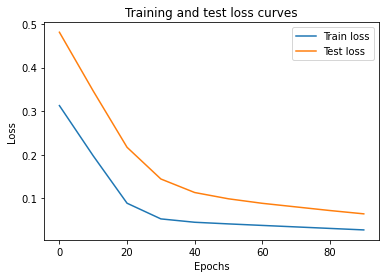

In [ ]:
# Menampilkan kurva loss
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();


Menampilkan kurva loss pada training set dan test set.

Kode ini memplot kurva loss pada training set dan test set untuk melihat bagaimana loss berkembang selama proses training.







In [ ]:
# Menampilkan nilai parameter yang dipelajari oleh model
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")


The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


menampilkan nilai parameter yang telah dipelajari oleh model dan membandingkannya dengan nilai parameter yang sebenarnya.



In [ ]:
# Setel model ke mode evaluasi
model_0.eval()

# Gunakan manajer konteks inference untuk membuat prediksi
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds


tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

Menampilkan prediksi yang dihasilkan oleh model.

Kode ini mengatur model dalam mode evaluasi dan menggunakan context manager inference untuk melakukan prediksi pada data test

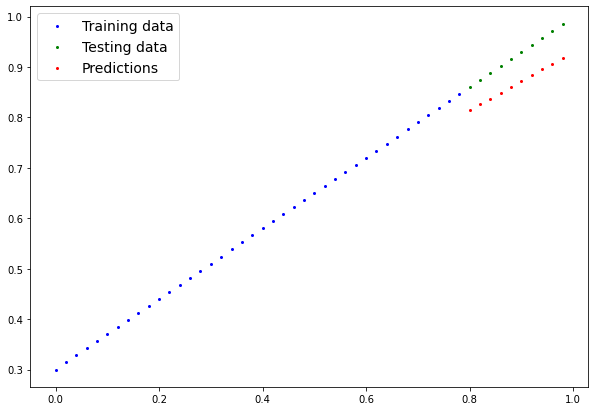

In [ ]:
plot_predictions(predictions=y_preds)


Menampilkan plot dari data training, data testing, dan prediksi yang dihasilkan oleh model.



In [ ]:
# Membuat direktori untuk menyimpan model
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Menentukan path untuk menyimpan model
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Menyimpan state_dict dari model
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

# Menampilkan path file yang disimpan
!ls -l models/01_pytorch_workflow_model_0.pth


Saving model to: models/01_pytorch_workflow_model_0.pth


Menampilkan path dari file model yang disimpan.

Kode ini membuat direktori untuk menyimpan model, menentukan path file untuk menyimpan model, menyimpan state_dict dari model, dan menampilkan path file yang disimpan.



In [ ]:
# Menginstansiasi model baru (dengan bobot acak)
loaded_model_0 = LinearRegressionModel()

# Memuat state_dict dari model yang disimpan
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# 1. Menempatkan model yang dimuat dalam mode evaluasi
loaded_model_0.eval()

# 2. Menggunakan context manager inference untuk membuat prediksi
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds


<All keys matched successfully>

Menampilkan prediksi yang dihasilkan oleh model yang dimuat.

Penjelasan: Kode ini menginstansiasi model baru, memuat state_dict dari model yang disimpan, mengatur model yang dimuat dalam mode evaluasi, dan menggunakan context manager inference untuk membuat prediksi menggunakan model yang dimuat.







Now we've made some predictions with the loaded model, let's see if they're the same as the previous predictions.

In [ ]:
# Membandingkan prediksi model sebelumnya dengan prediksi model yang dimuat (harusnya sama)
y_preds == loaded_model_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

Menampilkan hasil perbandingan antara prediksi model sebelumnya dan prediksi model yang dimuat.

Kode ini membandingkan hasil prediksi dari model sebelumnya (y_preds) dengan model yang dimuat (loaded_model_preds). Hasilnya seharusnya sama.



In [ ]:
# Import PyTorch dan matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Cek versi PyTorch
torch.__version__


'1.12.1+cu113'

Menampilkan versi PyTorch yang diinstal.

Kode ini mengimpor PyTorch dan matplotlib, serta menampilkan versi PyTorch yang diinstal.



In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")


Using device: cuda


Menampilkan perangkat yang akan digunakan (GPU jika tersedia, jika tidak, CPU).

Kode ini menentukan perangkat yang akan digunakan (GPU jika tersedia, jika tidak, CPU).



In [ ]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

Menampilkan panjang data untuk training set dan test set.

Kode ini membagi data menjadi training set dan test set, dan menampilkan panjang masing-masing set.



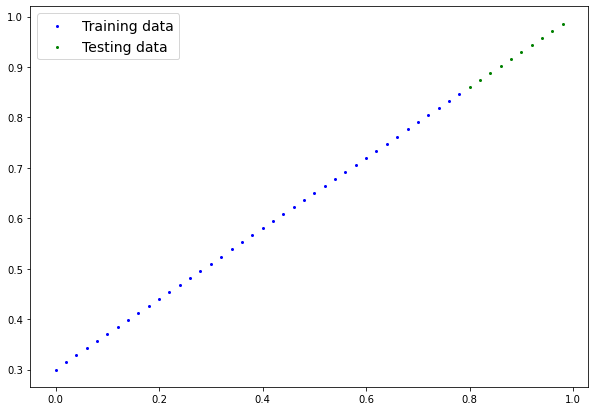

In [ ]:
# Catatan: Jika Anda mereset runtime, fungsi ini tidak akan berfungsi,
# Anda harus menjalankan sel di atasnya di mana fungsi ini diinisialisasi.
plot_predictions(X_train, y_train, X_test, y_test)


Menampilkan plot dari data training, data testing, dan prediksi yang dihasilkan oleh model.

Kode ini memplot data training, data testing, dan prediksi yang dihasilkan oleh model. Jika Anda mereset runtime, pastikan untuk menjalankan kembali sel yang mengandung fungsi plot_predictions.




In [ ]:
# Subclass nn.Module untuk membuat model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Gunakan nn.Linear() untuk membuat parameter-parameter model
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    # Tentukan komputasi maju (data input x melewati nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Tetapkan seed manual saat membuat model (ini tidak selalu diperlukan tetapi digunakan untuk tujuan demonstrasi, cobalah komentari dan lihat apa yang terjadi)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

Menampilkan model Linear Regression yang baru dibuat dan state_dict-nya.

Kode ini membuat model Linear Regression baru (model_1) dengan menggunakan subclass nn.Module yang telah ditentukan sebelumnya.



In [ ]:
# Cek model device
next(model_1.parameters()).device

device(type='cpu')

Menampilkan perangkat (device) tempat model berada.

Kode ini mengecek perangkat (device) tempat model berada. Pada contoh ini, model belum dipindahkan ke GPU, sehingga akan menunjukkan perangkat CPU.



In [ ]:
# Pindahkan model ke GPU jika tersedia, jika tidak akan menggunakan CPU secara default
model_1.to(device) # variabel device diatur sebelumnya menjadi "cuda" jika tersedia atau "cpu" jika tidak
next(model_1.parameters()).device


device(type='cuda', index=0)

Menampilkan perangkat (device) setelah model dipindahkan ke GPU jika tersedia.

Kode ini memindahkan model ke perangkat yang telah ditentukan sebelumnya (device), yang bisa berupa GPU jika tersedia atau CPU jika tidak.



In [ ]:
# Membuat loss function
loss_fn = nn.L1Loss()

# Membuat optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                            lr=0.01)

proses pembuatan loss function dan optimizer.

Kode ini membuat loss function menggunakan L1Loss (Mean Absolute Error) dan optimizer menggunakan Stochastic Gradient Descent (SGD) untuk mengoptimalkan parameter-parameter model.



In [ ]:
# Set seed agar hasil training dapat direproduksi
torch.manual_seed(42)

# Tentukan jumlah epochs
epochs = 1000

# Pindahkan data ke perangkat yang tersedia
# Tanpa ini, akan terjadi error (tidak semua model/data berada di perangkat yang sama)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Pelatihan
    model_1.train() # Mode pelatihan aktif secara default setelah konstruksi model

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Hitung loss
    loss = loss_fn(y_pred, y_train)

    # 3. Reset gradien optimizer
    optimizer.zero_grad()

    # 4. Backward pass untuk perhitungan gradien
    loss.backward()

    # 5. Optimasi parameter model
    optimizer.step()

    ### Pengujian
    model_1.eval() # Pindahkan model ke mode evaluasi untuk pengujian (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)

        # 2. Hitung loss pada data uji
        test_loss = loss_fn(test_pred, y_test)

    # Tampilkan hasil setiap 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 100 | Train loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 200 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 300 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 400 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 500 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 600 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 700 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 800 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 900 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882


Menampilkan loss pada setiap epoch selama proses training.

Kode di atas melatih model dengan melakukan iterasi sejumlah epochs, di mana setiap iterasi terdiri dari tahapan forward pass, perhitungan loss, backward pass, dan optimasi.



In [ ]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


Menampilkan nilai parameter yang telah dipelajari oleh model dan nilai parameter sebenarnya.

Kode ini menampilkan nilai parameter yang telah dipelajari oleh model (model_1) dan membandingkannya dengan nilai parameter sebenarnya.



In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

Menampilkan prediksi yang dihasilkan oleh model setelah proses training.

Kode ini mengubah model ke dalam mode evaluasi dan membuat prediksi pada data test.



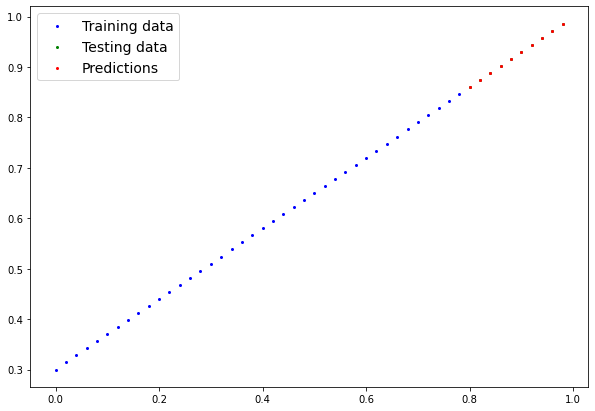

In [ ]:
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU

# Put data on the CPU and plot it
plot_predictions(predictions=y_preds.cpu())

Menampilkan plot dari data training, data testing, dan prediksi yang dihasilkan oleh model.

Kode ini mencoba untuk memplot hasil prediksi, namun perlu dilakukan transfer data dari GPU ke CPU sebelum memplot menggunakan fungsi plot_predictions.

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


Menyimpan model yang telah dilatih ke dalam file.

Kode ini menyimpan model yang telah dilatih ke dalam file dengan menggunakan fungsi torch.save.



In [ ]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")


Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0


Menampilkan model yang telah dimuat dan perangkat tempat model berada.

Kode ini membuat model yang baru (loaded_model_1), memuat parameter-parameter yang telah dilatih sebelumnya, dan memindahkan model ke perangkat yang telah ditentukan sebelumnya (device).



Now we can evaluate the loaded model to see if its predictions line up with the predictions made prior to saving.

In [ ]:
# Evaluasi loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

Menampilkan hasil perbandingan antara prediksi model sebelumnya dengan prediksi model yang dimuat.

Kode ini mengevaluasi model yang telah dimuat dan membandingkan hasil prediksinya dengan model sebelumnya. Hasilnya seharusnya sama.





